In [166]:
import pandas as  pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [352]:
data = pd.read_csv("./train_data.csv",encoding='gbk')
print("数据列名:{}".format(data.columns))
print("数据长度:{},数据列数:{}".format(data.shape[0],data.shape[1]))

数据列名:Index(['id', 'account', 'group', 'IP', 'url', 'port', 'vlan', 'switchIP',
       'time', 'ret'],
      dtype='object')
数据长度:528690,数据列数:10


#### 数据描述

In [353]:
data

,id,account,group,IP,url,port,vlan,switchIP,time,ret
0,1,xiaojiawei@qq.com,人事行政中心,192.168.1.50,http://123.6.4.41,15788,700,129.30.06.37,2021/6/16 7:56,0.1149
1,2,xiaojiawei@qq.com,人事行政中心,192.168.31.46,http://104.192.108.154,12665,700,152.91.89.45,2021/6/28 7:58,0.1801
2,3,xiaojiawei@qq.com,人事行政中心,192.168.2.3,http://42.236.37.80,25551,700,129.30.06.37,2021/6/1 6:37,0.3690
3,4,xiaojiawei@qq.com,人事行政中心,192.168.145.30,http://uf-api6-client.ksord.com,18274,700,162.6.8.29,2021/5/5 8:18,0.1532
4,5,xiaojiawei@qq.com,人事行政中心,192.168.178.92,http://101.199.128.170,34572,700,162.0.1.84,2021/6/20 6:52,0.1449
...,...,...,...,...,...,...,...,...,...,...
528685,528686,caopeiyi@qq.com,研发中心,192.168.145.165,http://tianqi.2345.com,35656,1000,129.5.70.220,2021/5/4 12:23,0.5647
528686,528687,caopeiyi@qq.com,研发中心,192.168.27.183,http://mail.qq.com,21731,1000,198.0.9.70,2021/6/26 11:33,0.5234
528687,528688,caopeiyi@qq.com,研发中心,10.40.0.6,http://mail.qq.com,11128,1000,168.6.94.22,2021/6/20 10:17,0.5478
528688,528689,caopeiyi@qq.com,研发中心,192.168.2.130,http://221.130.199.50,31618,1000,130.1.98.77,2021/6/19 11:05,0.5697


#### 特征工程


In [354]:
# 时间转换
# data["year"] = pd.to_datetime(data["time"]).dt.year
# data["month"] = pd.to_datetime(data["time"]).dt.month
# data["day"] = pd.to_datetime(data["time"]).dt.day
data["hour"] = pd.to_datetime(data["time"]).dt.hour
del data["time"]
### url转换，包含com的为0，含cn的为1，含net为2 只有数字的为3
def judge_url(x):
    if "com" in x:return 0
    if "cn" in x:return 1
    if "net" in x:return 2
    else:return 3
# data["url_com"] = data["url"].apply(judge_url)
### ip末尾数提取
def extract_ip_0(x):
    return int(x.split(".")[0])
def extract_ip_1(x):
    return int(x.split(".")[1])
def extract_ip_2(x):
    return int(x.split(".")[2])
def extract_ip_3(x):
    return int(x.split(".")[3])
data["IP_0"] = data["IP"].apply(extract_ip_0)
data["IP_1"] = data["IP"].apply(extract_ip_1)
data["IP_2"] = data["IP"].apply(extract_ip_2)
data["IP_3"] = data["IP"].apply(extract_ip_3)
# data["switchIP_0"] = data["switchIP"].apply(extract_ip_0)
# data["switchIP_1"] = data["switchIP"].apply(extract_ip_1)
# data["switchIP_2"] = data["switchIP"].apply(extract_ip_2)
# data["switchIP_3"] = data["switchIP"].apply(extract_ip_3)
# 账号长度
def len_account(x):
    return len(x.split("@")[0])
data["account_len"] = data["account"].apply(len_account)
data["group_len"] = data["group"].apply(len_account)

data

,id,account,group,IP,url,port,vlan,switchIP,ret,hour,IP_0,IP_1,IP_2,IP_3,account_len,group_len
0,1,xiaojiawei@qq.com,人事行政中心,192.168.1.50,http://123.6.4.41,15788,700,129.30.06.37,0.1149,7,192,168,1,50,10,6
1,2,xiaojiawei@qq.com,人事行政中心,192.168.31.46,http://104.192.108.154,12665,700,152.91.89.45,0.1801,7,192,168,31,46,10,6
2,3,xiaojiawei@qq.com,人事行政中心,192.168.2.3,http://42.236.37.80,25551,700,129.30.06.37,0.3690,6,192,168,2,3,10,6
3,4,xiaojiawei@qq.com,人事行政中心,192.168.145.30,http://uf-api6-client.ksord.com,18274,700,162.6.8.29,0.1532,8,192,168,145,30,10,6
4,5,xiaojiawei@qq.com,人事行政中心,192.168.178.92,http://101.199.128.170,34572,700,162.0.1.84,0.1449,6,192,168,178,92,10,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
528685,528686,caopeiyi@qq.com,研发中心,192.168.145.165,http://tianqi.2345.com,35656,1000,129.5.70.220,0.5647,12,192,168,145,165,8,4
528686,528687,caopeiyi@qq.com,研发中心,192.168.27.183,http://mail.qq.com,21731,1000,198.0.9.70,0.5234,11,192,168,27,183,8,4
528687,528688,caopeiyi@qq.com,研发中心,10.40.0.6,http://mail.qq.com,11128,1000,168.6.94.22,0.5478,10,10,40,0,6,8,4
528688,528689,caopeiyi@qq.com,研发中心,192.168.2.130,http://221.130.199.50,31618,1000,130.1.98.77,0.5697,11,192,168,2,130,8,4


In [355]:
##编码
cat_feature= ["account","group","IP","url","vlan"]
for cat_f in cat_feature:
    lab_ecd = LabelEncoder()
    data[cat_f+"_ecd"] = lab_ecd.fit_transform(data[cat_f])


In [356]:
### 删除不要的列

use_data = data.copy()
use_data.drop(cat_feature,axis=1,inplace=True)
use_data.drop(["port","switchIP","ret","id"],axis=1,inplace=True)
use_data["ret"] = data["ret"]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528690 entries, 0 to 528689
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   hour         528690 non-null  int64  
 1   IP_0         528690 non-null  int64  
 2   IP_1         528690 non-null  int64  
 3   IP_2         528690 non-null  int64  
 4   IP_3         528690 non-null  int64  
 5   account_len  528690 non-null  int64  
 6   group_len    528690 non-null  int64  
 7   account_ecd  528690 non-null  int64  
 8   group_ecd    528690 non-null  int64  
 9   IP_ecd       528690 non-null  int64  
 10  url_ecd      528690 non-null  int64  
 11  vlan_ecd     528690 non-null  int64  
 12  ret          528690 non-null  float64
dtypes: float64(1), int64(12)
memory usage: 52.4 MB


In [357]:
from sklearn.model_selection import KFold
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, make_scorer, roc_curve, f1_score, auc, log_loss, r2_score,mean_squared_error
from sklearn import svm

训练数据长度158607，训练数据标签长度158607，验证数据长度105738，验证数据标签长度105738
[0]	validation_0-rmse:0.25218


/data/miniconda3/envs/env-3.8.8/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[5]	validation_0-rmse:0.14601
[10]	validation_0-rmse:0.13252
[15]	validation_0-rmse:0.12766
[20]	validation_0-rmse:0.12276
[25]	validation_0-rmse:0.11941
[30]	validation_0-rmse:0.11577
[35]	validation_0-rmse:0.11366
[40]	validation_0-rmse:0.11207
[45]	validation_0-rmse:0.11067
[50]	validation_0-rmse:0.10847
[55]	validation_0-rmse:0.10669
[60]	validation_0-rmse:0.10565
[65]	validation_0-rmse:0.10470
[70]	validation_0-rmse:0.10360
[75]	validation_0-rmse:0.10239
[80]	validation_0-rmse:0.10173
[85]	validation_0-rmse:0.10092
[90]	validation_0-rmse:0.10009
[95]	validation_0-rmse:0.09963
[99]	validation_0-rmse:0.09901
0.09888521072063308
r2: 0.7969962002260909
mean_squared_error 0.009778284899264007


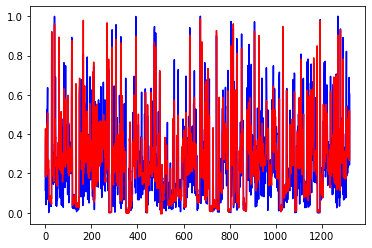

训练数据长度158607，训练数据标签长度158607，验证数据长度105738，验证数据标签长度105738
[0]	validation_0-rmse:0.25289


/data/miniconda3/envs/env-3.8.8/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[5]	validation_0-rmse:0.14450
[10]	validation_0-rmse:0.13234
[15]	validation_0-rmse:0.12676
[20]	validation_0-rmse:0.12338
[25]	validation_0-rmse:0.11999
[30]	validation_0-rmse:0.11697
[35]	validation_0-rmse:0.11445
[40]	validation_0-rmse:0.11242
[45]	validation_0-rmse:0.11021
[50]	validation_0-rmse:0.10916
[55]	validation_0-rmse:0.10751
[60]	validation_0-rmse:0.10631
[65]	validation_0-rmse:0.10554
[70]	validation_0-rmse:0.10477
[75]	validation_0-rmse:0.10341
[80]	validation_0-rmse:0.10279
[85]	validation_0-rmse:0.10180
[90]	validation_0-rmse:0.10089
[95]	validation_0-rmse:0.10032
[99]	validation_0-rmse:0.09979
0.09941428853724893
r2: 0.7942716603261962
mean_squared_error 0.009883200765367384


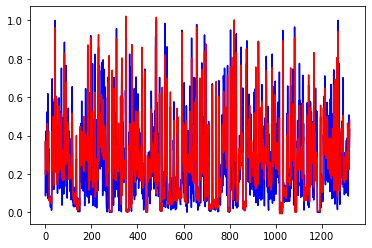

In [358]:
k_fold = 2
seed = 1000
kf = KFold(n_splits=k_fold,shuffle=True,random_state=seed)
for ii,[train_index,test_index] in enumerate(kf.split(use_data)):
    train_data = use_data.iloc[train_index].reset_index(drop=True)
    test_data = use_data.loc[test_index].reset_index(drop=True)
    trainx,trainy,test_x,test_y = train_data.iloc[:,:-1],train_data.iloc[:,-1],test_data.iloc[:,:-1],test_data.iloc[:,-1]
    train_x,val_x,train_y,val_y = train_test_split(trainx, trainy, test_size=0.4)
    print("训练数据长度{}，训练数据标签长度{}，验证数据长度{}，验证数据标签长度{}".format(train_x.shape[0],train_y.shape[0],val_x.shape[0],val_y.shape[0]))
    model = XGBRegressor()
    model.fit(train_x,train_y,early_stopping_rounds=1,eval_set=[(val_x, val_y)], verbose=5)
    mape = np.sqrt(np.sum((test_y - model.predict(test_x))**2)/len(test_y))
    print(mape)
    print('r2:',r2_score(test_y ,model.predict(test_x)))
    print("mean_squared_error",mean_squared_error(test_y ,model.predict(test_x)))
    plt.plot(np.array(test_y)[::200],color="b")
    plt.plot(model.predict(test_x)[::200],color="r")
    plt.show()

In [359]:
model.feature_importances_

array([0.38178194, 0.03049931, 0.04608614, 0.05113108, 0.06276499,
       0.05440249, 0.05956744, 0.08646462, 0.08893567, 0.03935827,
       0.04203241, 0.05697568], dtype=float32)

In [360]:
test_x.columns

Index(['hour', 'IP_0', 'IP_1', 'IP_2', 'IP_3', 'account_len', 'group_len',
       'account_ecd', 'group_ecd', 'IP_ecd', 'url_ecd', 'vlan_ecd'],
      dtype='object')